<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/Maxwell_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


參考資料一
* [What would Maxwell plot? (a replication with matplotlib)](http://flothesof.github.io/what-would-maxwell-plot.html)
* [Maxwell's diagram](https://gist.github.com/ColCarroll/13e5e013f2f2f4d46d15120219ab18a7)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

class ChargedParticle:
    def __init__(self, pos, charge):
        self.pos = np.asarray(pos)
        self.charge = charge

    def compute_field(self, x, y):
        X, Y = np.meshgrid(x, y)
        u_i = np.hstack((X.ravel()[:, np.newaxis],  Y.ravel()[:, np.newaxis])) - self.pos #define unit vectors
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        field = ((self.charge / r**2).ravel()[:, np.newaxis] * u_i).reshape(X.shape + (2,))
        return field

    def compute_potential(self, x, y):
        X, Y = np.meshgrid(x, y)
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        potential = self.charge / r
        return potential


In [ ]:
x = np.linspace(-5, 5, 100) # define 100 coordinate x points between (-5,5) locate at equal spaces
y = np.linspace(-4, 4, 80) # define 80 coordinate y points between (-4,4) locate at equal spaces

X, Y = np.meshgrid(x, y) # compose

q1 = ChargedParticle((-1, 0), -1)
q2 = ChargedParticle((1, 0), 1)

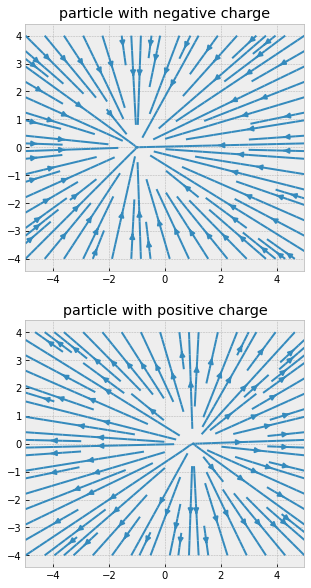

In [ ]:
field1 = q1.compute_field(x, y)
field2 = q2.compute_field(x, y)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 10))
ax1.streamplot(x, y, u=field1[:, :, 0], v=field1[:, :, 1])
ax1.set_title("particle with negative charge");
ax1.axis('equal')
ax2.streamplot(x, y, u=field2[:, :, 0], v=field2[:, :, 1])
ax2.set_title("particle with positive charge");
ax2.axis('equal');

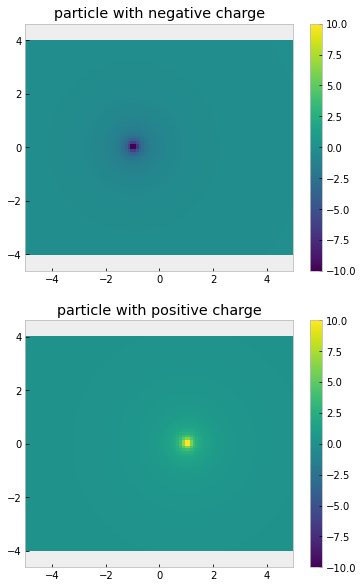

In [ ]:
pot1 = q1.compute_potential(x, y)
pot2 = q2.compute_potential(x, y)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 10))
map1 = ax1.pcolormesh(x, y, pot1, vmin=-10, vmax=10)
ax1.set_title("particle with negative charge");
ax1.axis('equal')
plt.colorbar(map1, ax=ax1)
map2 = ax2.pcolormesh(x, y, pot2, vmin=-10, vmax=10)
ax2.set_title("particle with positive charge");
ax2.axis('equal');
plt.colorbar(map2, ax=ax2);

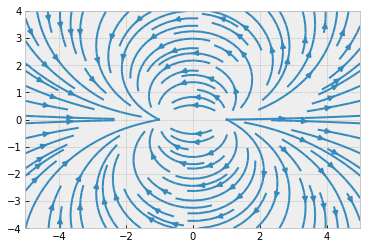

In [ ]:
def compute_resulting_field(particles, x, y):
    fields = [p.compute_field(x, y) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field

total_field = compute_resulting_field([q1, q2], x, y)

plt.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1])
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max());

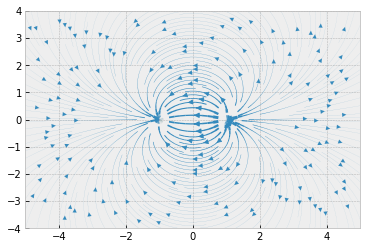

In [ ]:
lw = np.linalg.norm(total_field, axis=2)
lw /= lw.max()
plt.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1], linewidth=10*lw, density=2)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max());

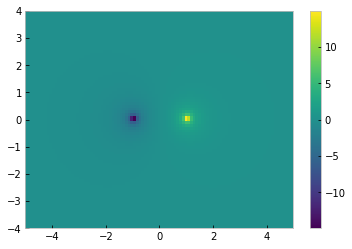

In [ ]:
def compute_resulting_potential(particles, x, y):
    potentials = [p.compute_potential(x, y) for p in particles]
    total_potential = np.zeros_like(potentials[0])
    for pot in potentials:
        total_potential += pot
    return total_potential

total_potential = compute_resulting_potential([q1, q2], x, y)
plt.pcolormesh(x, y, total_potential)
plt.colorbar();

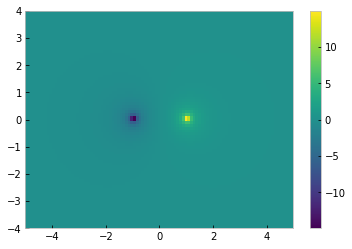

In [ ]:
total_potential = compute_resulting_potential([q1, q2], x, y)
plt.pcolormesh(x, y, total_potential)
plt.colorbar();

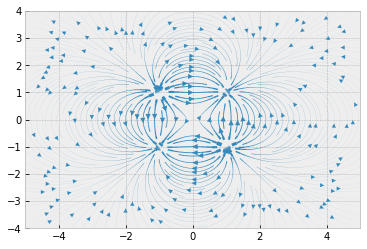

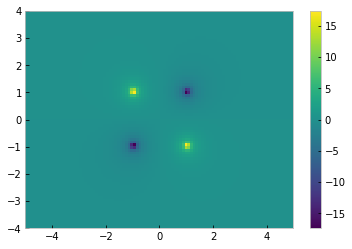

In [ ]:
q1 = ChargedParticle((1, 1), -1)
q2 = ChargedParticle((-1, 1), 1)
q3 = ChargedParticle((-1, -1), -1)
q4 = ChargedParticle((1, -1), 1)
total_field = compute_resulting_field([q1, q2, q3, q4], x, y)
total_potential = compute_resulting_potential([q1, q2, q3, q4], x, y)

lw = np.linalg.norm(total_field, axis=2)
lw /= lw.max()
fig, ax = plt.subplots()
ax.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1], linewidth=10*lw, density=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

fig, ax = plt.subplots()
mappable = ax.pcolormesh(x, y, total_potential)
plt.colorbar(mappable);

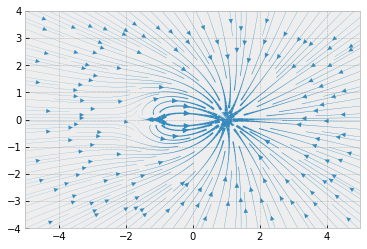

In [ ]:
q1 = ChargedParticle((1, 0), -4)
q2 = ChargedParticle((-1, 0), 1)
total_field = compute_resulting_field([q1, q2], x, y)
lw = np.linalg.norm(total_field, axis=2)
lw /= lw.max()
plt.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1], linewidth=20*lw, density=2)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max());